# Trabajo Individual



## Modulo: M4_E1 API4
## Asignatura: Análisis y Visualizacion de Datos
## Docente Online: James Tomalá Robles
## Fecha de Entrega: 05 de octubre de 2023



# Identificación del Estudiante:
## Nombre y Apellido: Hugo Morales Paredes
## Carrera: Tecnico Data Science

# **CONSIGNA 1a.**

# *Hipotesis 1:*

## Sabiendo que Buenos Aires es donde se concentra la mayor poblacion, por ser la capital del pais, es donde se genera la mayor cantidad de exportaciones totales.

## Para el analisis exploratorio de la hipotesis 1, utilizaremos el dataset 'exportaciones.csv'

In [1]:
# importamos librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leemos dataset

exportaciones_df = pd.read_csv('exportaciones.csv', encoding='latin-1')

In [3]:
# visualizamos dataset

exportaciones_df.head()

,rubro,provincia,anio,value
0,Total,Total País,2005,40386.762
1,Total,Buenos Aires,2005,15626.865
2,Total,Capital Federal,2005,271.295
3,Total,Córdoba,2005,4452.178
4,Total,Entre Ríos,2005,815.341


In [4]:
# tipos de datos

exportaciones_df.dtypes

rubro        object
provincia    object
anio          int64
value        object
dtype: object

In [5]:
# Convertimos el valor de la columna 'value' a tipo numerico

exportaciones_df['value'] = pd.to_numeric(
    exportaciones_df['value'], errors='coerce')

## El dataset tiene las siguientes columnas:  
### rubro: Tipo de producto o categoría de exportación.
### provincia: Provincia desde la cual se originan las exportaciones.
### anio: Año en el que se registraron las exportaciones.
### value: Valor de las exportaciones en una unidad no especificada.

In [6]:
# Agrupamos los datos por 'provincia' y 'value', sumamos y le damos orden descendente.

exportaciones_por_provincia = exportaciones_df.groupby(
    'provincia')['value'].sum().sort_values(ascending=False)

exportaciones_por_provincia

provincia
Total País             1998455.853
Buenos Aires            690328.740
Santa Fe                445009.470
Córdoba                 266533.781
Chubut                   80341.323
Santa Cruz               52943.983
Mendoza                  46759.999
Entre Ríos               44240.795
San Juan                 44027.141
Catamarca                33350.490
Salta                    32033.854
Tucumán                  28247.555
Santiago del Estero      20004.604
San Luis                 18397.447
Río Negro                15784.845
Misiones                 14250.675
Jujuy                    12788.607
Neuquén                  11729.881
La Pampa                 11581.818
Capital Federal          11307.938
Chaco                    10687.844
Tierra del Fuego          9749.933
La Rioja                  7249.351
Corrientes                7105.700
Formosa                   1233.441
Name: value, dtype: float64

In [7]:
# Total País: 1,998,455.853 (Este es el total general y no se considerará en la comparación).

exportaciones_por_provincia.drop('Total País')

provincia
Buenos Aires           690328.740
Santa Fe               445009.470
Córdoba                266533.781
Chubut                  80341.323
Santa Cruz              52943.983
Mendoza                 46759.999
Entre Ríos              44240.795
San Juan                44027.141
Catamarca               33350.490
Salta                   32033.854
Tucumán                 28247.555
Santiago del Estero     20004.604
San Luis                18397.447
Río Negro               15784.845
Misiones                14250.675
Jujuy                   12788.607
Neuquén                 11729.881
La Pampa                11581.818
Capital Federal         11307.938
Chaco                   10687.844
Tierra del Fuego         9749.933
La Rioja                 7249.351
Corrientes               7105.700
Formosa                  1233.441
Name: value, dtype: float64

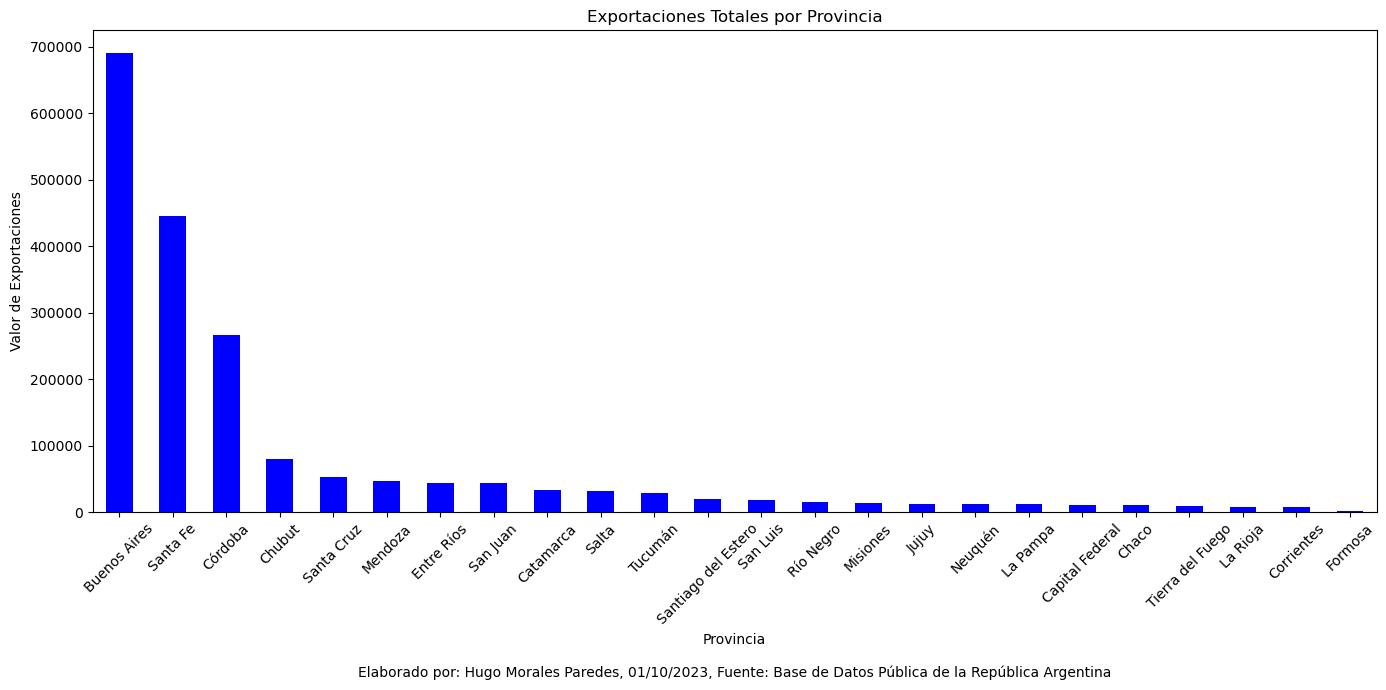

In [8]:
# Graficamos en un grafico de barras para realizar la comparacion. Sin 'Total País'.

plt.figure(figsize=(14, 7))
exportaciones_por_provincia.drop('Total País').plot(
    kind='bar', color='blue')
plt.title('Exportaciones Totales por Provincia')
plt.ylabel('Valor de Exportaciones')
plt.xlabel('Provincia\n\nElaborado por: Hugo Morales Paredes, 01/10/2023, Fuente: Base de Datos Pública de la República Argentina')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Estadisticas descriptivas

exportaciones_por_provincia.describe()

count    2.500000e+01
mean     1.565658e+05
std      4.156810e+05
min      1.233441e+03
25%      1.158182e+04
50%      2.000460e+04
75%      4.676000e+04
max      1.998456e+06
Name: value, dtype: float64

# **Conclusion:**

## *Buenos Aires claramente lidera la lista con el valor más alto de exportaciones, confirmando la hipótesis propuesta. Le siguen Santa Fe y Córdoba. Las demás provincias tienen valores significativamente más bajos en comparación con Buenos Aires.*

# **CONSIGNA 1b.**

# *Hipotesis 2:*  

## La proyeccion de esperanza de vida, en la Republica Argentina, de mujeres es mayor a la de los hombres.

## Para el analisis exploratorio de la hipotesis 2, utilizaremos el dataset 'esperanza_de_vida.csv'

In [10]:
# Las librerias necesarias ya fueron importadas.

import numpy as np

In [11]:
# leemos dataset

esperanza_vida_df = pd.read_csv('esperanza_de_vida.csv', encoding='latin-1')

In [12]:
esperanza_vida_df.head()

,provincia,anio,mujeres,varones
0,Buenos Aires,2015,80.22,73.54
1,Buenos Aires,2020,81.34,74.74
2,Buenos Aires,2025,82.32,75.80
3,Buenos Aires,2030,83.20,76.76
4,Buenos Aires,2035,83.98,77.60


In [13]:
# tipo de datos

esperanza_vida_df.dtypes

provincia     object
anio           int64
mujeres      float64
varones      float64
dtype: object

## Para comprobar si la esperanza de vida de las mujeres sera mayor que la de los hombres, podemos calcular el promedio de la esperanza de vida para cada género en todos los años y provincias disponibles en el dataset.

In [14]:
# Calcular el promedio de la esperanza de vida para mujeres y varones

promedio_mujeres = esperanza_vida_df["mujeres"].mean().round(5)
promedio_varones = esperanza_vida_df["varones"].mean().round(5)

promedio_mujeres, promedio_varones

(82.71035, 76.41778)

## El promedio de la esperanza de vida para las mujeres sera de 82.71 años, mientras que para los varones sera de 76.42 años.

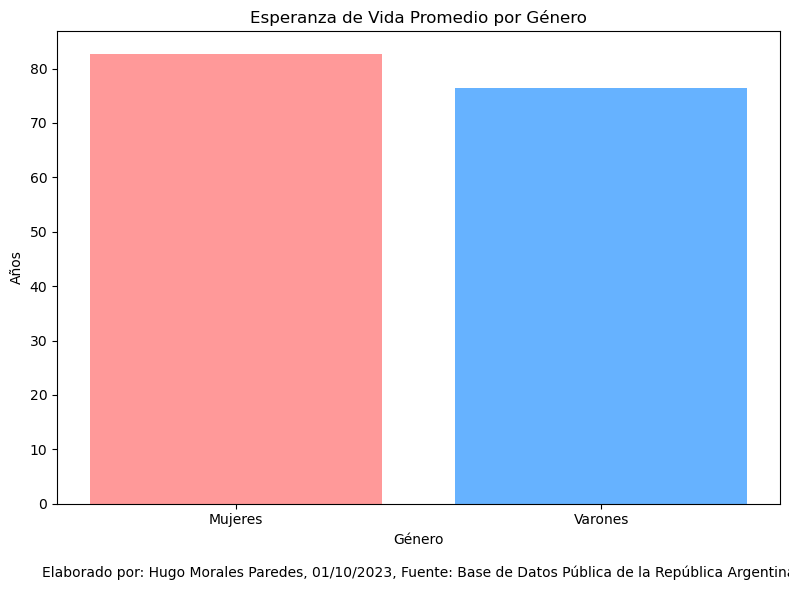

In [15]:
# Datos para el gráfico
labels = ['Mujeres', 'Varones']
values = [promedio_mujeres, promedio_varones]
colors = ['#FF9999', '#66B2FF']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)

# Añadir título y etiquetas
plt.title('Esperanza de Vida Promedio por Género')
plt.ylabel('Años')
plt.xlabel('Género\n\nElaborado por: Hugo Morales Paredes, 01/10/2023, Fuente: Base de Datos Pública de la República Argentina')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## La proyección de esperanza de vida en hombres y mujeres ira creciendo en el tiempo, para ello graficamos la tendencia de la esperanza de vida promedio para mujeres y varones a lo largo de los años en el dataset.

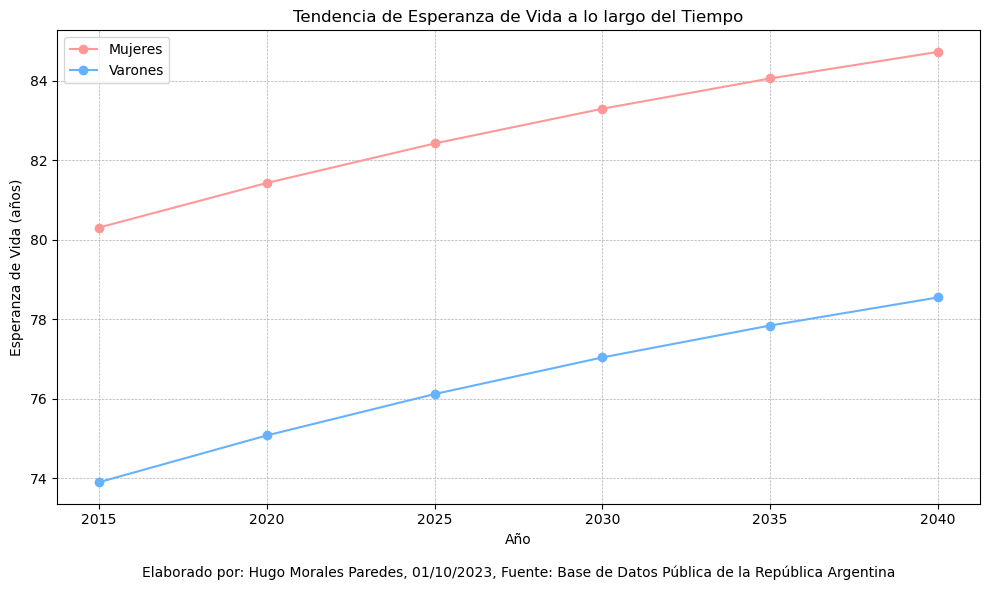

In [16]:
# Agrupar por año y calcular el promedio de esperanza de vida para cada género, especificando numeric_only=True
data_grouped_updated = esperanza_vida_df.groupby(
    'anio').mean(numeric_only=True)

# Crear el gráfico de líneas nuevamente
plt.figure(figsize=(10, 6))
plt.plot(data_grouped_updated.index,
         data_grouped_updated['mujeres'], label='Mujeres', color='#FF9999', marker='o')
plt.plot(data_grouped_updated.index,
         data_grouped_updated['varones'], label='Varones', color='#66B2FF', marker='o')

# Añadir título, etiquetas y leyenda
plt.title('Tendencia de Esperanza de Vida a lo largo del Tiempo')
plt.ylabel('Esperanza de Vida (años)')
plt.xlabel('Año\n\nElaborado por: Hugo Morales Paredes, 01/10/2023, Fuente: Base de Datos Pública de la República Argentina')
plt.legend()

# Mostrar el gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [17]:
# Calcular las estadísticas descriptivas para la esperanza de vida de hombres y mujeres

stats_mujeres = esperanza_vida_df['mujeres'].describe().round(2)
stats_varones = esperanza_vida_df['varones'].describe().round(2)

stats_mujeres, stats_varones

(count    144.00
 mean      82.71
 std        1.64
 min       78.32
 25%       81.53
 50%       82.86
 75%       84.12
 max       85.46
 Name: mujeres, dtype: float64,
 count    144.00
 mean      76.42
 std        1.75
 min       71.53
 25%       75.18
 50%       76.60
 75%       77.89
 max       79.27
 Name: varones, dtype: float64)

# **Conclusión**

## *El gráfico de líneas muestra claramente que la esperanza de vida, tanto para mujeres como para varones, ha ido en aumento a lo largo del tiempo. Por lo tanto, la hipótesis de que "la proyección de esperanza de vida en hombres y mujeres irá creciendo en el tiempo" parece ser cierta según los datos proporcionados en el dataset.*

# **Consigna 2.**

# *La tasa de desempleo en Buenos Aires en enero de 2009 fue del 5%.*

In [18]:
# importamos librerias

import pandas as pd

In [19]:
# Leemos el dataset 'empleo.csv'

empleo_data = pd.read_csv('empleo.csv', encoding='ISO-8859-1')

# Mostrando las primeras filas del dataset

empleo_data.head(20)

,provincia,anio,mes,empleados_registrados_miles
0,Buenos Aires,2009,ene-09,1787.640
1,Buenos Aires,2009,feb-09,1769.223
2,Buenos Aires,2009,mar-09,1745.913
3,Buenos Aires,2009,abr-09,1729.917
4,Buenos Aires,2009,may-09,1723.218
5,Buenos Aires,2009,jun-09,1724.903
6,Buenos Aires,2009,jul-09,1722.949
7,Buenos Aires,2009,ago-09,1720.649
8,Buenos Aires,2009,sep-09,1727.501
9,Buenos Aires,2009,oct-09,1741.995


In [20]:
# tipos de datos

empleo_data.dtypes

provincia                       object
anio                             int64
mes                             object
empleados_registrados_miles    float64
dtype: object

In [21]:
# nombre de las columnas (labels)

empleo_data.columns

Index(['provincia', 'anio', 'mes', 'empleados_registrados_miles'], dtype='object')

In [22]:
# informacion de la tabla

empleo_data.info

<bound method DataFrame.info of          provincia  anio     mes  empleados_registrados_miles
0     Buenos Aires  2009  ene-09                     1787.640
1     Buenos Aires  2009  feb-09                     1769.223
2     Buenos Aires  2009  mar-09                     1745.913
3     Buenos Aires  2009  abr-09                     1729.917
4     Buenos Aires  2009  may-09                     1723.218
...            ...   ...     ...                          ...
3691       Tucumán  2021  jun-21                      172.053
3692       Tucumán  2021  jul-21                      172.030
3693       Tucumán  2021  ago-21                      171.015
3694       Tucumán  2021  sep-21                      168.084
3695       Tucumán  2021  oct-21                      165.578

[3696 rows x 4 columns]>

### El conjunto de datos contiene información sobre el empleo registrado en diferentes provincias de Argentina, desglosado por año y mes. Las columnas son:

provincia: Nombre de la provincia.  
anio: Año del registro.  
mes: Mes del registro en formato "mmm-aa".  
empleados_registrados_miles: Número de empleados registrados en miles.

In [23]:
# Filtrar los datos para Buenos Aires en enero de 2009

empleo_ba_ene_2009 = empleo_data[(empleo_data['provincia'] == 'Buenos Aires') &
                                 (empleo_data['anio'] == 2009) &
                                 (empleo_data['mes'] == 'ene-09')]

empleo_ba_ene_2009

,provincia,anio,mes,empleados_registrados_miles
0,Buenos Aires,2009,ene-09,1787.64


## Para calcular la tasa de desempleo, se requiere la siguiente fórmula:



                             Tasa de desempleo = (Numero de personas desempleadas / Fuerza laboral) * 100


Dado que nuestro conjunto de datos solo nos proporciona el número de empleados registrados, no tenemos información sobre las personas que buscan activamente empleo ni sobre la fuerza laboral total. Por lo tanto, no podemos calcular la tasa de desempleo.

Basándonos en la exploración del conjunto de datos, podemos observar lo siguiente:

1. El conjunto de datos contiene registros de 24 provincias diferentes.
2. Hay datos desde el año 2009 hasta el 2021.
3. Existen 154 combinaciones únicas de meses y años en el conjunto de datos.
4. La columna `empleados_registrados_miles` tiene 3650 valores únicos.



# **Conclusión**

## Por lo tanto, aunque sabemos cuántas personas están empleadas en cada provincia, mes y año, no tenemos la información necesaria para determinar cuántas personas están desempleadas o cuántas están en la fuerza laboral total. Como resultado, no podemos calcular la tasa de desempleo con este conjunto de datos.

# **CONSIGNA 3.**

## Tres aspectos a tener en cuenta para comunicar datos a una audiencia no técnica:

## 1.- Utilizar un lenguaje sencillo y claro. Es importante evitar el uso de términos técnicos o jerga que puedan dificultar la comprensión del mensaje. En su lugar, se debe utilizar un lenguaje sencillo y claro que pueda ser entendido por todos.

## 2.- Ofrecer ejemplos, explicaciones y apoyo visual. Los ejemplos y las explicaciones pueden ayudar a ilustrar los datos y hacerlos más fáciles de entender. Por ejemplo, si se está presentando datos o resultados apoyarse con presentaciones de graficos sencillos y ppt.

## 3.- Contextualizar los datos. Es importante contextualizar los datos para que la audiencia pueda comprender su significado. Esto se puede hacer proporcionando información sobre el origen de los datos, los métodos utilizados para recopilarlos y las limitaciones de los datos.
